In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data = pd.read_csv(r"C:\Users\samir\iris flower classification\iris dataset\iris data.csv")

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [7]:
data.isnull().values.any()

False

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

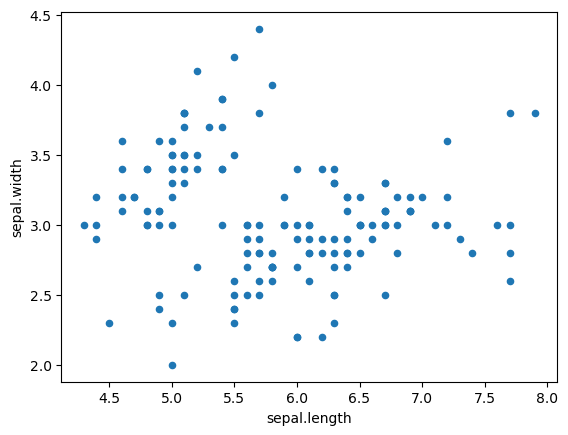

In [8]:
data.plot(kind = 'scatter', x = 'sepal.length', y = 'sepal.width')

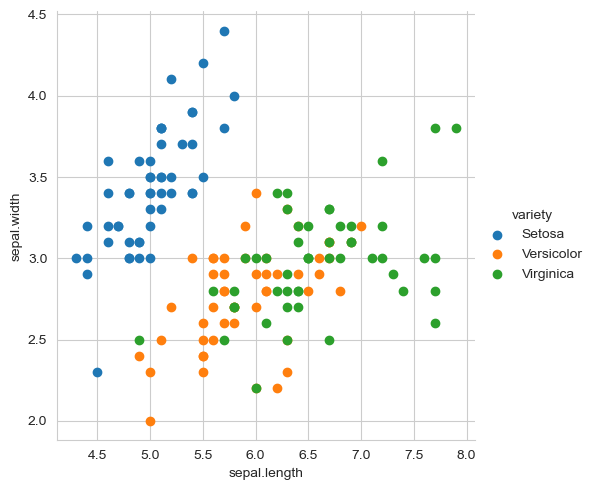

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='variety', height = 5).map(plt.scatter, 'sepal.length','sepal.width').add_legend()

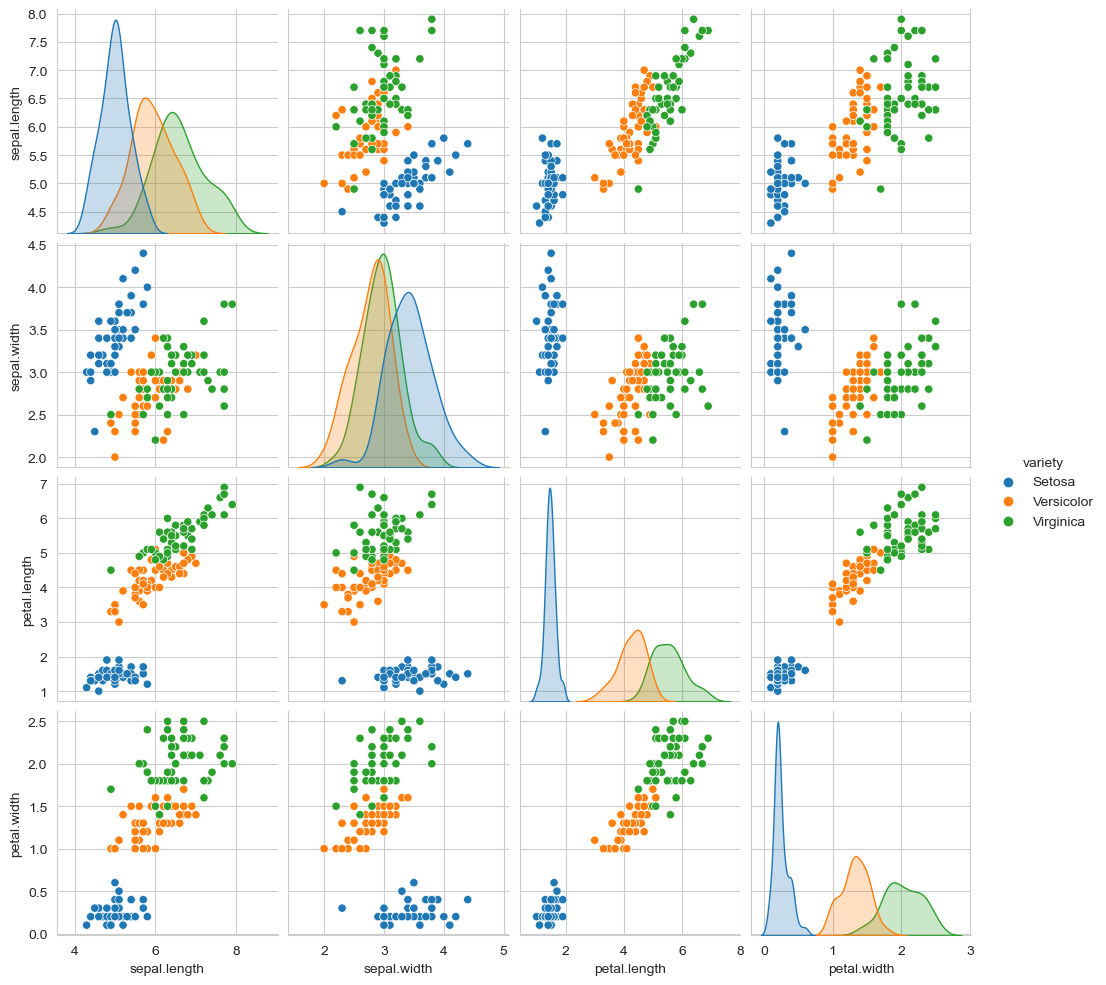

In [10]:
sns.pairplot(data, hue='variety')

In [11]:
x = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values
y = data[["variety"]].values

In [12]:
# LogisticRegression model 
Model = LogisticRegression()
Model.fit(x,y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# accuracy of the regression model
Model.score(x,y).round(2)

0.97

In [14]:
# prediction
Actual = y
predicted = Model.predict(x)

In [15]:
from sklearn import metrics
print(metrics.classification_report(Actual,predicted))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.98      0.94      0.96        50
   Virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [16]:
print(metrics.confusion_matrix(Actual, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [17]:
predicted = Model.predict([[5.1,3.5,1.4,0.2]])
predicted

array(['Setosa'], dtype=object)

In [18]:
predicted = Model.predict([[4.6,3.1,1.5,0.2]])
predicted

array(['Setosa'], dtype=object)

In [19]:
predicted = Model.predict([[6.2,2.9,4.3,1.3]])
predicted

array(['Versicolor'], dtype=object)

In [20]:
# train_test_split method
train, test = train_test_split(data, test_size = 0.25)

In [21]:
train

,sepal.length,sepal.width,petal.length,petal.width,variety
114,5.8,2.8,5.1,2.4,Virginica
92,5.8,2.6,4.0,1.2,Versicolor
119,6.0,2.2,5.0,1.5,Virginica
87,6.3,2.3,4.4,1.3,Versicolor
24,4.8,3.4,1.9,0.2,Setosa
...,...,...,...,...,...
77,6.7,3.0,5.0,1.7,Versicolor
127,6.1,3.0,4.9,1.8,Virginica
33,5.5,4.2,1.4,0.2,Setosa
144,6.7,3.3,5.7,2.5,Virginica


In [22]:
test

,sepal.length,sepal.width,petal.length,petal.width,variety
97,6.2,2.9,4.3,1.3,Versicolor
85,6.0,3.4,4.5,1.6,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
22,4.6,3.6,1.0,0.2,Setosa
93,5.0,2.3,3.3,1.0,Versicolor
130,7.4,2.8,6.1,1.9,Virginica
14,5.8,4.0,1.2,0.2,Setosa
17,5.1,3.5,1.4,0.3,Setosa
149,5.9,3.0,5.1,1.8,Virginica
111,6.4,2.7,5.3,1.9,Virginica


In [23]:
train_x = train[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]


In [24]:
train_y = train.variety

In [25]:
train_x

,sepal.length,sepal.width,petal.length,petal.width
114,5.8,2.8,5.1,2.4
92,5.8,2.6,4.0,1.2
119,6.0,2.2,5.0,1.5
87,6.3,2.3,4.4,1.3
24,4.8,3.4,1.9,0.2
...,...,...,...,...
77,6.7,3.0,5.0,1.7
127,6.1,3.0,4.9,1.8
33,5.5,4.2,1.4,0.2
144,6.7,3.3,5.7,2.5


In [28]:
test_y

97     Versicolor
85     Versicolor
96     Versicolor
22         Setosa
93     Versicolor
130     Virginica
14         Setosa
17         Setosa
149     Virginica
111     Virginica
57     Versicolor
138     Virginica
104     Virginica
102     Virginica
1          Setosa
128     Virginica
142     Virginica
19         Setosa
20         Setosa
146     Virginica
139     Virginica
40         Setosa
59     Versicolor
109     Virginica
72     Versicolor
34         Setosa
21         Setosa
134     Virginica
49         Setosa
88     Versicolor
123     Virginica
38         Setosa
124     Virginica
3          Setosa
64     Versicolor
73     Versicolor
69     Versicolor
98     Versicolor
Name: variety, dtype: object

In [29]:
test_x = test[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
test_y = test.variety

In [30]:
# support vector machine model
model = svm.SVC()

In [31]:
model.fit(train_x, train_y)
pred = model.predict(test_x)

In [32]:
metrics.accuracy_score(pred, test_y)

0.9736842105263158

In [34]:
# DecisionTree Model
model = DecisionTreeClassifier()

In [35]:
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [36]:
pred = model.predict(test_x)

In [37]:
metrics.accuracy_score(pred, test_y)

0.9736842105263158